In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, cohen_kappa_score, precision_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, f1_score, roc_auc_score, roc_curve
import math
import random
import os
import pkg_resources
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import whitebox

# Sky View Factor classification
We load the Sky View Factor for all the examined zones and reclassify it to binary. The threshold used is 0.955.

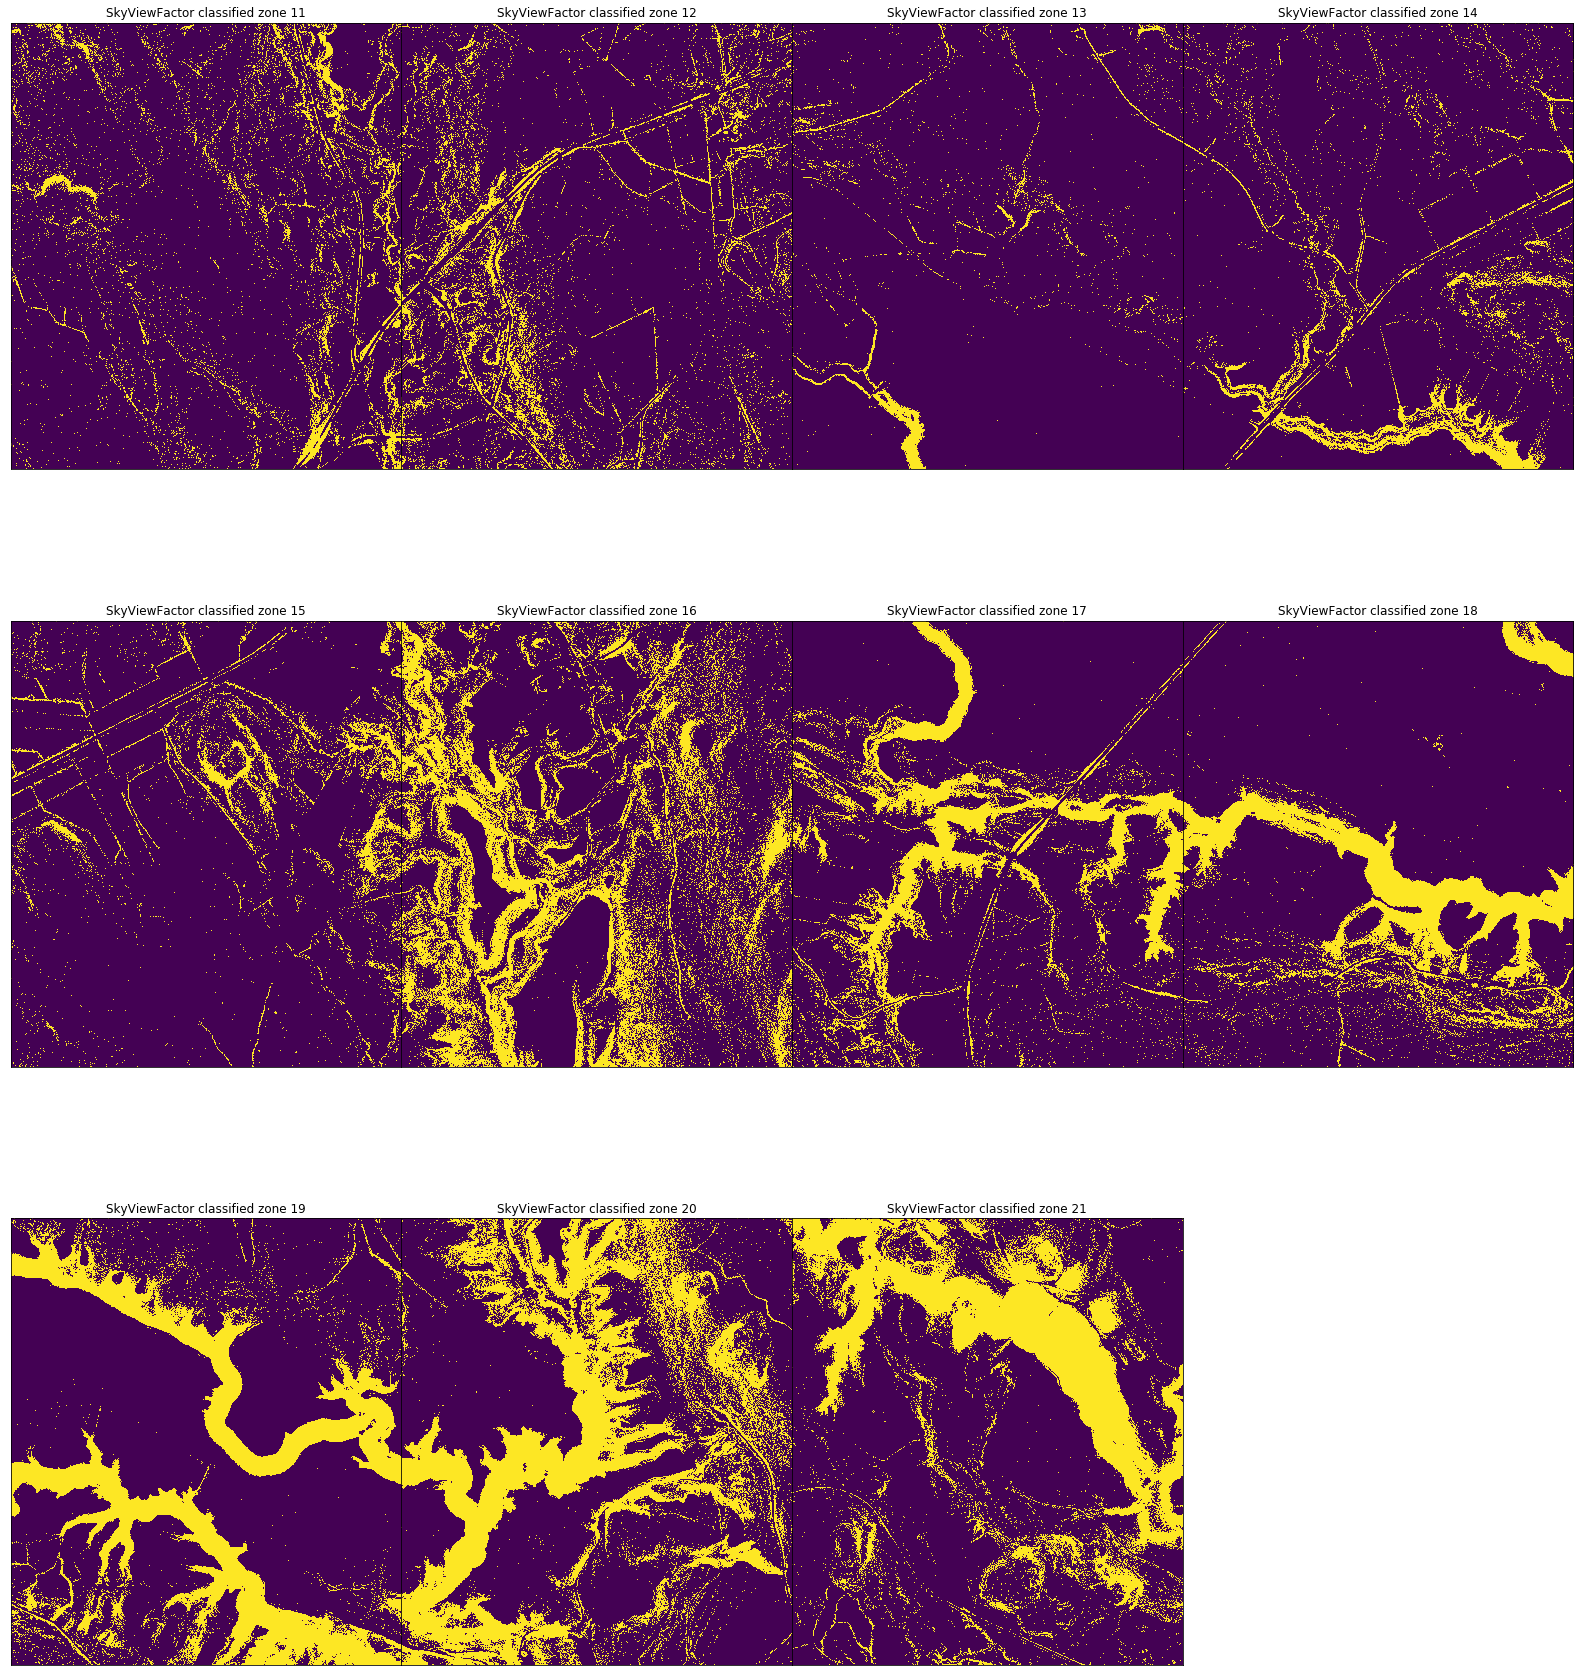

In [5]:
file_list = [f"../Raw_Data_21_zones/SkyViewFactor_{i}.npy" for i in range(11, 22)]

plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(3,4,i+1) for i in range(11)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)


l = 11
for zone_file in file_list:
    zone = np.load(zone_file)
    classifier = zone.copy()
    for i in range(len(zone)):
        for j in range(len(zone[i])):
            if zone[i][j] < 0.955:
                classifier[i][j] = 1
            else:
                classifier[i][j] = 0
    np.save(f"../recreated/svf/svf_classified_{l}.npy", classifier)
    ax[l-11].title.set_text(f"SkyViewFactor classified zone {l}")
    ax[l-11].imshow(classifier)
    l += 1    

# Sky View Factor results
The results were summarised for the 11 zones. Ditches with a width of 3.5m were used as labels to make the comparason between the models as fair as possible.

In [6]:
classifier_list = [f"../recreated/svf/svf_classified_{i}.npy" for i in range(11, 22)]
labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
y_pred_all = []
y_test_all = []

for classifier in classifier_list:
    y_pred_all.extend(np.load(classifier).reshape(-1))
for label in labels_list:
    y_test_all.extend(np.load(label).reshape(-1))
    
print("Accuracy score             ", accuracy_score(y_test_all, y_pred_all))
print("Recall score               ", recall_score(y_test_all, y_pred_all))
print("Precision score            ", precision_score(y_test_all, y_pred_all))
precision, recall, threshholds = precision_recall_curve(y_test_all,y_pred_all)
auc_score = auc(recall, precision)
print("Cohen's kappa score        ", cohen_kappa_score(y_test_all, y_pred_all))
print("AUPRC score                ", auc_score)
print("Confusion matrix\n", confusion_matrix(y_test_all, y_pred_all))

Accuracy score              0.836728759757
Recall score                0.445426475464
Precision score             0.0400173343025
Cohen's kappa score         0.04806123191
AUPRC score                 0.246749752995
Confusion matrix
 [[71712368 13406516]
 [  695799   558857]]


# Impoundment Index classification
We load the Impoundment index for all the examined zones and reclassify it to binary. The threshold used is 0.27.

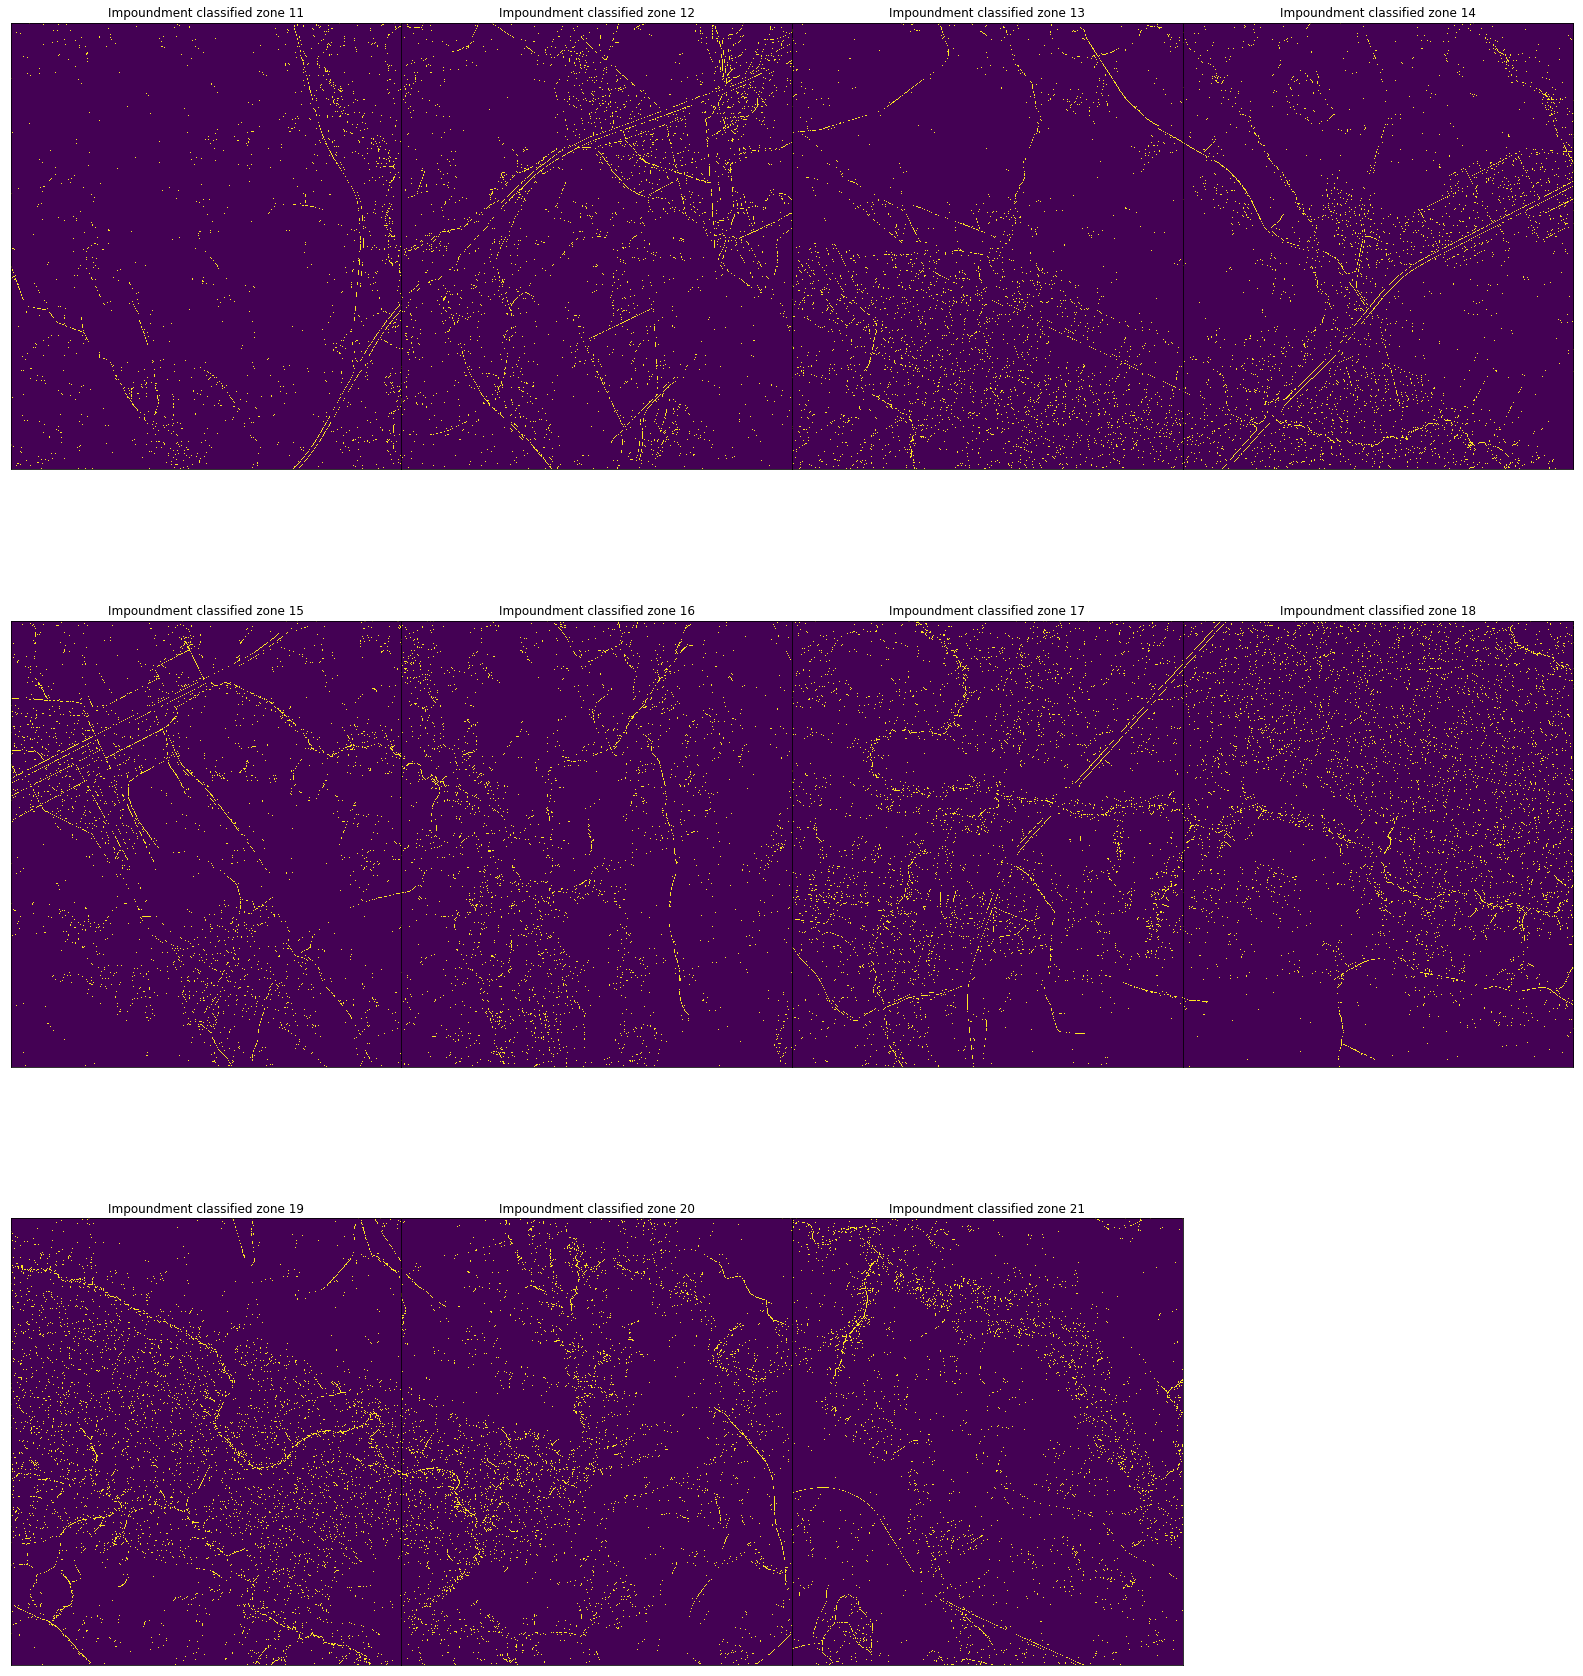

In [7]:
file_list = [f"../Raw_Data_21_zones/Impoundment_{i}.npy" for i in range(11, 22)]

plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(3,4,i+1) for i in range(11)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

l = 11
for zone_file in file_list:
    zone = np.load(zone_file)
    classifier = zone.copy()
    
    for i in range(len(zone)):
        for j in range(len(zone[i])):
            if zone[i][j] > 0.27:
                classifier[i][j] = 1
            else:
                classifier[i][j] = 0
    np.save(f"../recreated/imp/imp_classified_{l}.npy", classifier)
    ax[l-11].title.set_text(f"Impoundment classified zone {l}")
    ax[l-11].imshow(classifier)
    l += 1

# Impoundment Index results
The results were summarised for the 11 zones. Ditches with a width of 3.5m were used as labels to make the comparason between the models as fair as possible.

In [14]:
classifier_list = [f"../recreated/imp/imp_classified_{i}.npy" for i in range(11, 22)]
labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
y_pred_all = []
y_test_all = []

for classifier in classifier_list:
    y_pred_all.extend(np.load(classifier).reshape(-1))
for label in labels_list:
    y_test_all.extend(np.load(label).reshape(-1))

print("Accuracy score             ", accuracy_score(y_test_all, y_pred_all))
print("Recall score               ", recall_score(y_test_all, y_pred_all))
print("Precision score            ", precision_score(y_test_all, y_pred_all))
precision, recall, threshholds = precision_recall_curve(y_test_all,y_pred_all)
auc_score = auc(recall, precision)
print("Cohen's kappa score        ", cohen_kappa_score(y_test_all, y_pred_all))
print("AUPRC score                ", auc_score)
print("Confusion matrix\n", confusion_matrix(y_test_all, y_pred_all))

Accuracy score              0.970654878797
Recall score                0.299798510508
Precision score             0.185085278855
Cohen's kappa score         0.214767835289
AUPRC score                 0.247527433609
Confusion matrix
 [[83462754  1656130]
 [  878512   376144]]


# HPMF classification
We load the HPMF for all the examined zones and reclassify it to binary. The threshold used is -0.18.

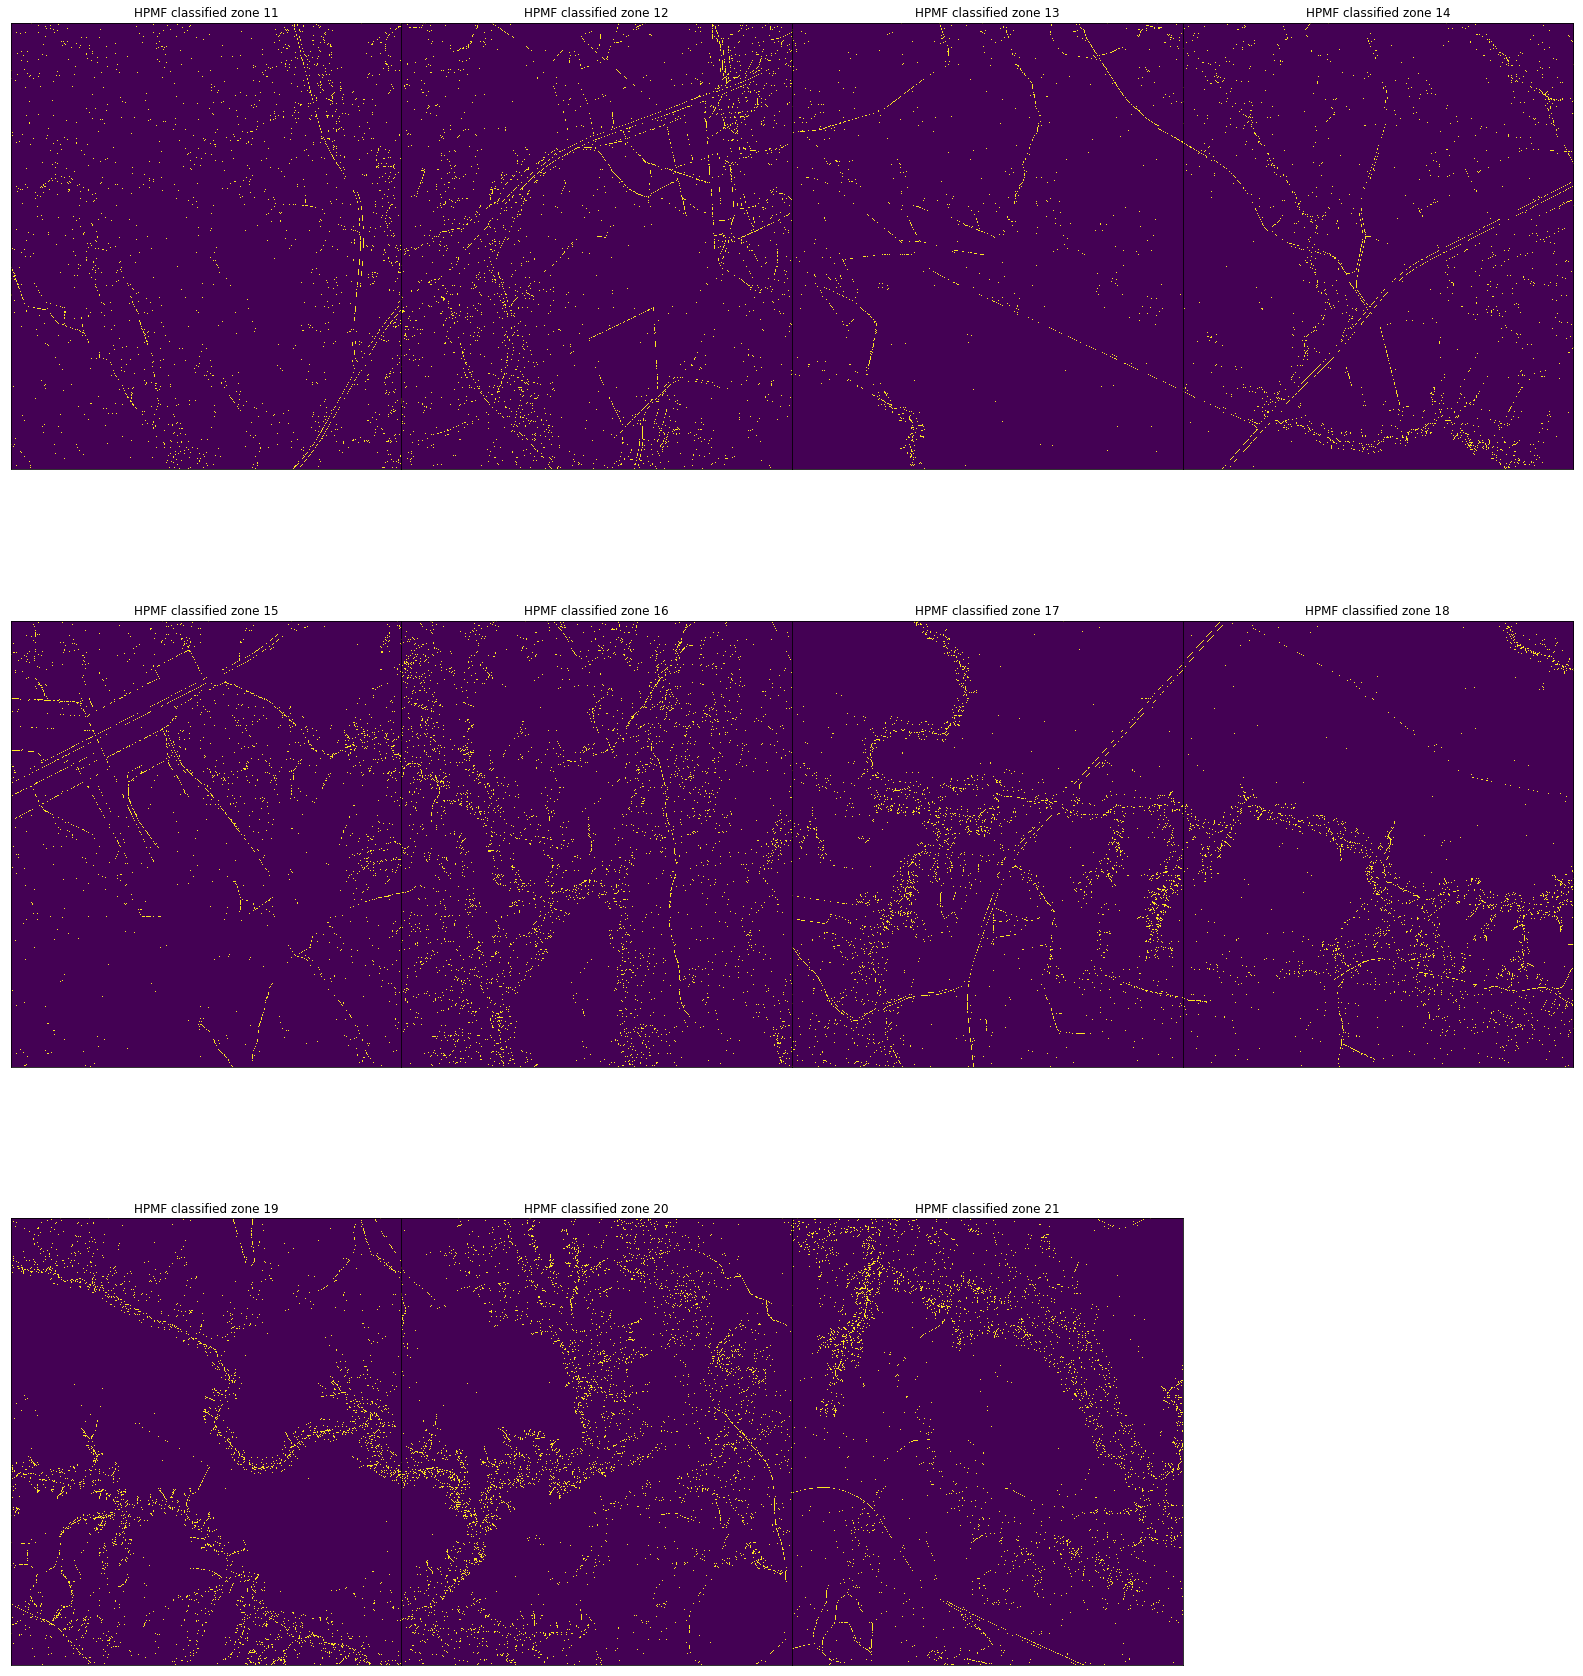

In [9]:
file_list = [f"../Raw_Data_21_zones/HPMF_{i}.npy" for i in range(11, 22)]

plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(3,4,i+1) for i in range(11)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

l = 11
for zone_file in file_list:
    zone = np.load(zone_file)
    classifier = zone.copy()
    
    for i in range(len(zone)):
        for j in range(len(zone[i])):
            if zone[i][j] < -0.18:
                classifier[i][j] = 1
            else:
                classifier[i][j] = 0
    np.save(f"../recreated/hpmf/hpmf_classified_{l}.npy", classifier)
    ax[l-11].title.set_text(f"HPMF classified zone {l}")
    ax[l-11].imshow(classifier)
    l += 1

In [11]:
classifier_list = [f"../recreated/hpmf/hpmf_classified_{i}.npy" for i in range(11, 22)]
labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
y_pred_all = []
y_test_all = []

for classifier in classifier_list:
    y_pred_all.extend(np.load(classifier).reshape(-1))
for label in labels_list:
    y_test_all.extend(np.load(label).reshape(-1))

print("Accuracy score             ", accuracy_score(y_test_all, y_pred_all))
print("Recall score               ", recall_score(y_test_all, y_pred_all))
print("Precision score            ", precision_score(y_test_all, y_pred_all))
precision, recall, threshholds = precision_recall_curve(y_test_all,y_pred_all)
auc_score = auc(recall, precision)
print("Cohen's kappa score        ", cohen_kappa_score(y_test_all, y_pred_all))
print("AUPRC score                ", auc_score)
print("Confusion matrix\n", confusion_matrix(y_test_all, y_pred_all))

Accuracy score              0.974530706973
Recall score                0.253120377219
Precision score             0.200951672862
Cohen's kappa score         0.21126575907
AUPRC score                 0.232460585618
Confusion matrix
 [[83856088  1262796]
 [  937077   317579]]


# Slope classification
We load the Slope for all the examined zones and reclassify it to binary. The threshold used is 14.

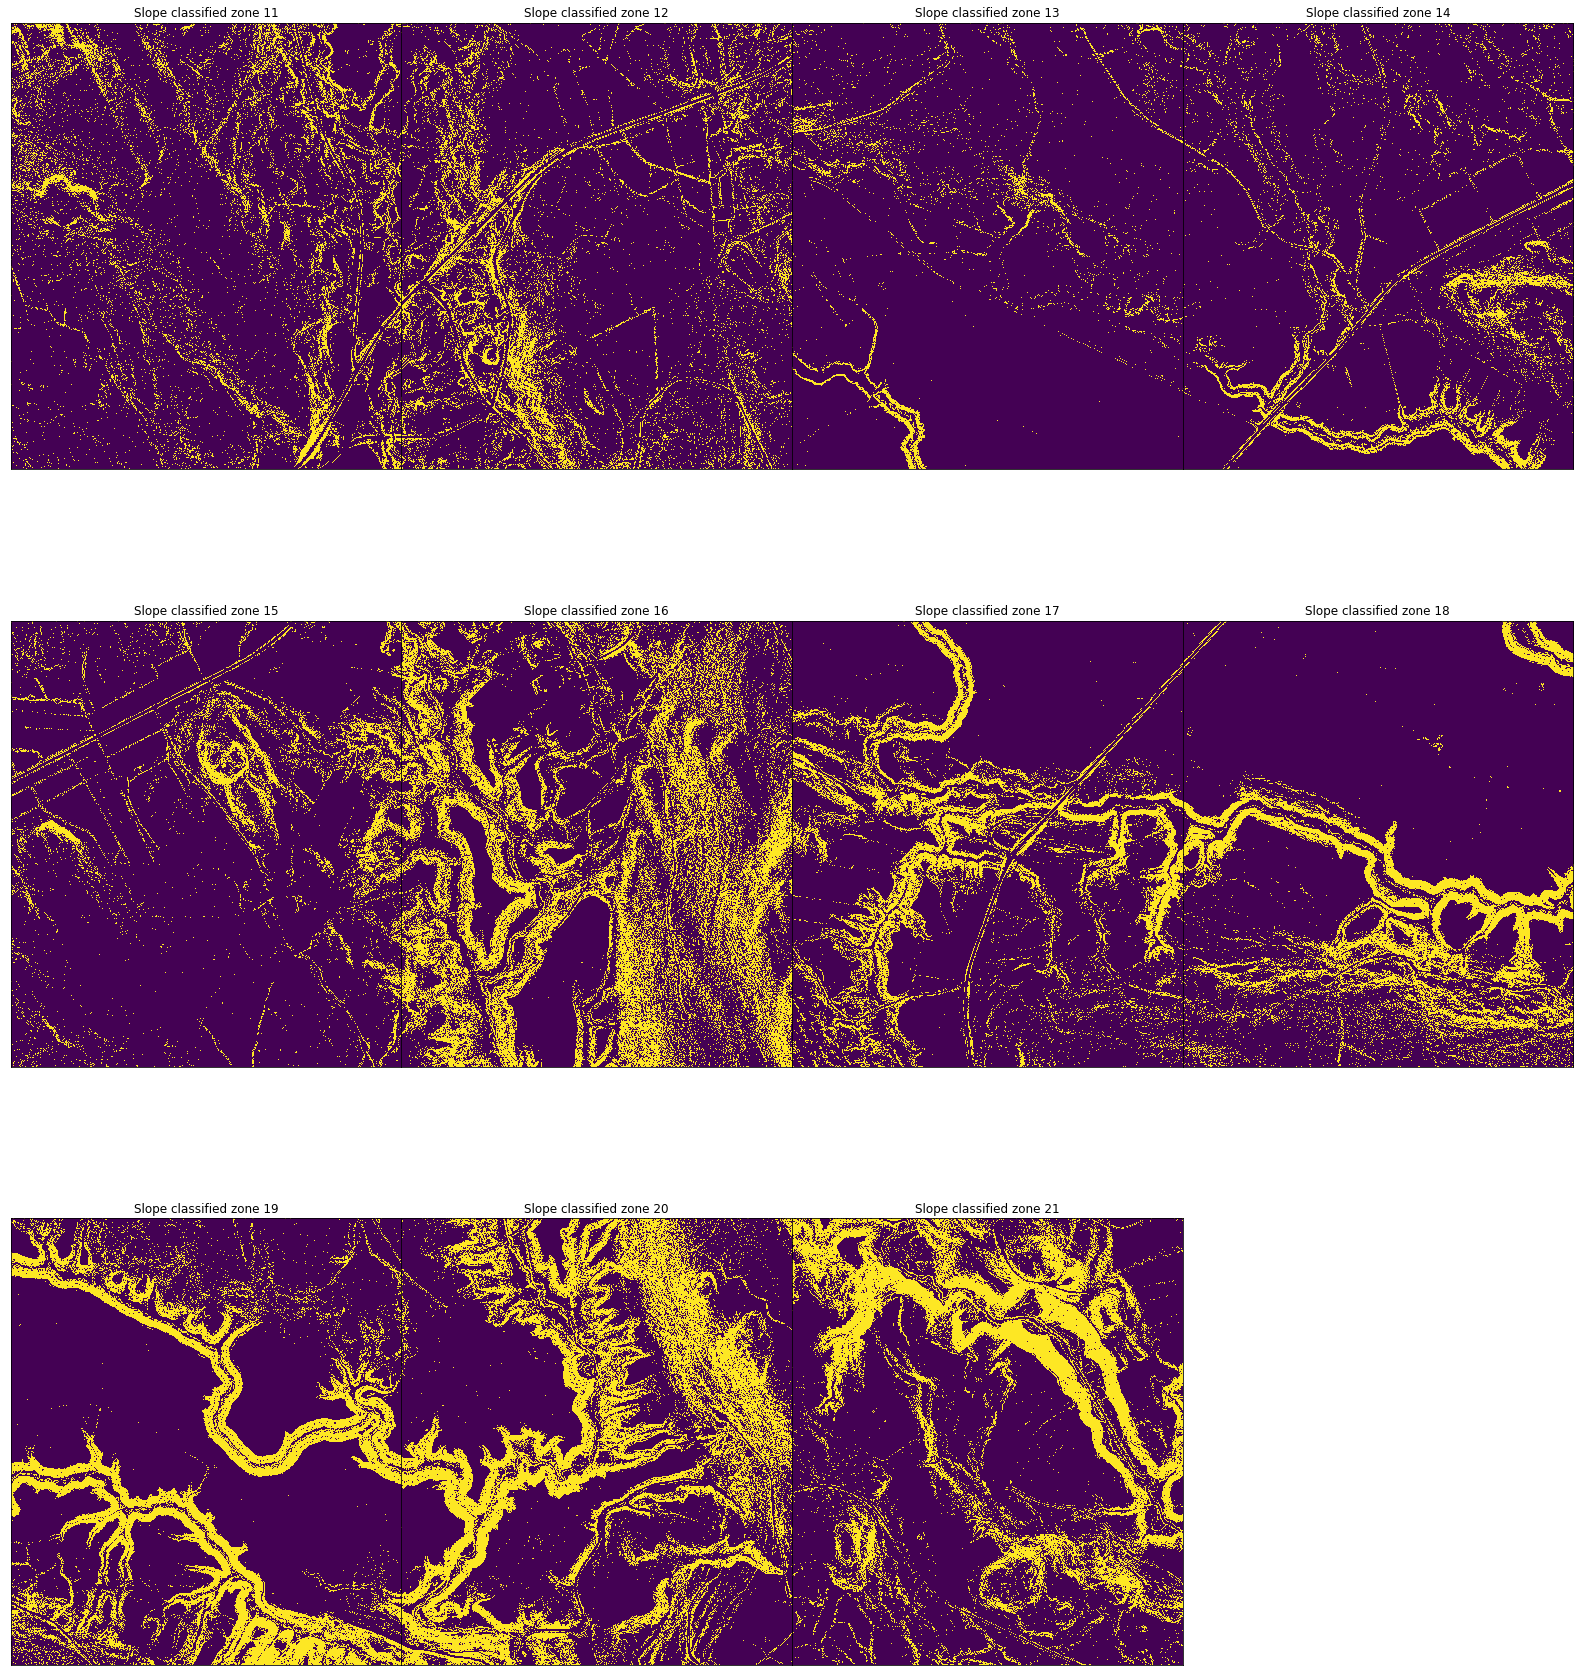

In [12]:
file_list = [f"../Raw_Data_21_zones/Slope_{i}.npy" for i in range(11, 22)]

plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(3,4,i+1) for i in range(11)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

l = 11
for zone_file in file_list:
    zone = np.load(zone_file)
    classifier = zone.copy()
    
    for i in range(len(zone)):
        for j in range(len(zone[i])):
            if zone[i][j] > 14:
                classifier[i][j] = 1
            else:
                classifier[i][j] = 0
    np.save(f"../recreated/slope/slope_classified_{l}.npy", classifier)
    ax[l-11].title.set_text(f"Slope classified zone {l}")
    ax[l-11].imshow(classifier)
    l += 1

In [13]:
classifier_list = [f"../recreated/slope/slope_classified_{i}.npy" for i in range(11, 22)]
labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
y_pred_all = []
y_test_all = []

for classifier in classifier_list:
    y_pred_all.extend(np.load(classifier).reshape(-1))
for label in labels_list:
    y_test_all.extend(np.load(label).reshape(-1))

print("Accuracy score             ", accuracy_score(y_test_all, y_pred_all))
print("Recall score               ", recall_score(y_test_all, y_pred_all))
print("Precision score            ", precision_score(y_test_all, y_pred_all))
precision, recall, threshholds = precision_recall_curve(y_test_all,y_pred_all)
auc_score = auc(recall, precision)
print("Cohen's kappa score        ", cohen_kappa_score(y_test_all, y_pred_all))
print("AUPRC score                ", auc_score)
print("Confusion matrix\n", confusion_matrix(y_test_all, y_pred_all))

Accuracy score              0.826577722761
Recall score                0.348291483881
Precision score             0.0299338037589
Cohen's kappa score         0.0291569273047
AUPRC score                 0.193845979978
Confusion matrix
 [[70957458 14161426]
 [  817670   436986]]
